In [2]:
!pip install langsmith

In [3]:
!pip install langchain langchain_community langgraph faiss-cpu langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.1/417.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.45
    Uninstalling langchain-core-0.3.45:
      Successfully uninstalled langchain-core-0.3.45
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitter

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import userdata
import os
import getpass

Groq = userdata.get('groq_api_key')
HF_Token = userdata.get('Hugging-face-Api')
Tavily_Api_key = userdata.get('Tavily_Api_key')

#set the enviroment variable
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGSMITH_API_KEY"] = getpass.getpass()
os.environ["GROQ_API_KEY"] = Groq
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HF_Token
os.environ["TAVILY_API_KEY"] = Tavily_Api_key

··········


In [5]:
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import LLMChain
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph,START,END
from langchain_core.output_parsers import StrOutputParser
from langchain.prompts import PromptTemplate

In [6]:
#Set the Model
Model = ChatGroq(
    model="qwen-2.5-32b",
    temperature=".4"
)

In [7]:
Model.invoke("Who is imaran khan?")

AIMessage(content="I believe you might be referring to Iman Khan, but there isn't a widely recognized public figure by this exact name. There are a few possibilities depending on who you might be asking about:\n\n1. **Imran Khan** - A well-known Pakistani politician, former cricketer, and the 20th Prime Minister of Pakistan from 2018 to 2022. He is the founder of the Pakistan Tehreek-e-Insaf (PTI) political party.\n\n2. If you are looking for information about someone else named Iman Khan, it would be helpful to provide more context or details so I can give you more accurate information.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 137, 'prompt_tokens': 36, 'total_tokens': 173, 'completion_time': 0.685, 'prompt_time': 0.004156575, 'queue_time': 0.238817701, 'total_time': 0.689156575}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-d9269654-af83-4e73-869b-3bf34336c49f-0', usage_m

In [8]:
urls=[
    "https://jalammar.github.io/illustrated-transformer/",
    "https://blogs.nvidia.com/blog/what-is-retrieval-augmented-generation/"
]

#loop over each url
docs = [WebBaseLoader(url).load() for url in urls]

#extarct the documents in the single list
docs_list = []
for item in docs:
  for doc in item:
    docs_list.append(doc)

#now preprocessing in the data
splitter = CharacterTextSplitter(chunk_size=2000,chunk_overlap=0)
docs = splitter.split_documents(docs_list)

#convert it into embeddings
Embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2",
)
vectorstore = FAISS.from_documents(docs,Embeddings)

<ipython-input-8-7ffa39f427bb>:20: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  Embeddings = HuggingFaceEmbeddings(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
docs[0].page_content

"The Illustrated Transformer – Jay Alammar – Visualizing machine learning one concept at a time.\n\nJay Alammar\nVisualizing machine learning one concept at a time.Read our book, Hands-On Large Language Models and follow me on LinkedIn, Bluesky, Substack, X,YouTube \n\n\nBlog\nAbout\n\n\nThe Illustrated Transformer\n\nDiscussions:\nHacker News (65 points, 4 comments), Reddit r/MachineLearning (29 points, 3 comments)\n\n\nTranslations: Arabic, Chinese (Simplified) 1, Chinese (Simplified) 2, French 1, French 2, Italian, Japanese, Korean, Persian, Russian, Spanish 1, Spanish 2, Vietnamese\n\nWatch: MIT’s Deep Learning State of the Art lecture referencing this post\n\nFeatured in courses at Stanford, Harvard, MIT, Princeton, CMU and others\n\nUpdate: This post has now become a book! Check out LLM-book.com which contains (Chapter 3) an updated and expanded version of this post speaking about the latest Transformer models and how they've evolved in the seven years since the original Transfor

In [10]:
retriever  = vectorstore.as_retriever(search="cosine",search_kwargs={"k":2})

In [13]:
res=retriever.invoke("What Is Retrieval-Augmented Generation (RAG)?")

In [15]:
res[1].page_content

'Editor’s note: This article, originally published on Nov. 15, 2023, has been updated.\nTo understand the latest advancements in generative AI, imagine a courtroom.\nJudges hear and decide cases based on their general understanding of the law. Sometimes a case — like a malpractice suit or a labor dispute — requires special expertise, so judges send court clerks to a law library, looking for precedents and specific cases they can cite.\nLike a good judge, large language models (LLMs) can respond to a wide variety of human queries. But to deliver authoritative answers — grounded in specific court proceedings or similar ones\xa0 — the model needs to be provided that information.\nThe court clerk of AI is a process called retrieval-augmented generation, or RAG for short.\nHow It Got Named ‘RAG’\nPatrick Lewis, lead author of the 2020 paper that coined the term, apologized for the unflattering acronym that now describes a growing family of methods across hundreds of papers and dozens of com

In [29]:
prompt = PromptTemplate(
    template="""You are a teacher grading a quiz. You will be given:
    1/ a QUESTION
    2/ A FACT provided by the student

    You are grading RELEVANCE RECALL:
    A score of 1 means that ANY of the statements in the FACT are relevant to the QUESTION.
    A score of 0 means that NONE of the statements in the FACT are relevant to the QUESTION.
    1 is the highest (best) score. 0 is the lowest score you can give.


    Avoid simply stating the correct answer at the outset.

    Question: {question} \n
    Fact: \n\n {documents} \n\n

    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question. \n
    Provide the binary score as a JSON with a single key 'score' no explanation and anything and dont mentioned name json while output just gave the score only.\n
    But before that read the question carefully.\n
    Explain the reasoning in step by step manner.\n
    Then gave the step by step reasoning and conclusion \n
    Strictly make sure that value of key 'score' could be either 'yes' or 'no', nothing else
    """,
    input_variables=["question", "documents"],
)

retrieval_grader = prompt | Model | StrOutputParser()
question = "What is rag?"
docs = retriever.invoke(question)
doc_txt = docs[1].page_content
print(retrieval_grader.invoke({"question": question, "documents": doc_txt}))


Step by step reasoning:

1. The question asks for the definition or explanation of "rag".
2. The fact provided is a detailed explanation of "retrieval-augmented generation", commonly abbreviated as "RAG".
3. The fact directly defines and explains what RAG is, which is relevant to the question asked.
4. The information provided goes beyond just defining RAG, offering context, applications, and historical background, but the core of the information is directly related to the question.

Conclusion: The fact is relevant to the question asked.

{"score": "yes"}


In [30]:
# ### Generate

Genrate_Template = PromptTemplate(
    template="""You are an assistant for question-answering tasks.

    Use the following documents to answer the question.

    If you don't know the answer, just say that you don't know.

    According to the documents, answer the question and mentioned also According to the document.

    Use three sentences maximum and keep the answer concise:
    Question: {question}
    Documents: {documents}
    Answer:
    """,
    input_variables=["question", "documents"],
)

rag_chain  = Genrate_Template | Model | StrOutputParser()
print(rag_chain.invoke({"question": question, "documents": doc_txt}))

According to the document, RAG stands for retrieval-augmented generation, a technique that enhances the accuracy and reliability of generative AI models by incorporating information from specific and relevant data sources.


In [31]:
#### web search tools
from langchain_community.tools.tavily_search import TavilySearchResults
web_search_tool  = TavilySearchResults(k=3)

#Check the response
web_result=web_search_tool.invoke("What is multimodel rag")[0]

In [22]:
web_result["url"]

'https://medium.com/@tredencestudio/multi-modal-retrieval-augmented-generation-rag-systems-an-in-depth-overview-and-implementation-f5a7531be8a9'

In [32]:
#now i will create the graph
from langgraph.graph import START,StateGraph,END
from typing import List
from typing_extensions import TypedDict
from langchain.schema import Document
import json



class GraphState(TypedDict):
  """
  Represnt the state of the our graph

  Attribute:

    Question:str
    Genration: LLM
    Search : weather to add search
    documents : List[Document]
    steps : List[str]

  """

  question:str
  generation:str
  search:str
  documents:List[str]
  steps : List[str]



In [33]:
##retrive Node this will update the state with questioan and documents
def retrieve(state):
  """
  Retrive the Documents

  Args:
    state(dict) -> Current Graph state

  Returns:
    state(dict) -> New key added to state,that contain retrived documents.

  """
  question = state["question"]
  docs = retriever.invoke(question)   #this is the retriver that we make for faiss0cpu database
  steps = state["steps"]
  steps.append("retrived the documents")

  return{
      "documents":docs,
      "question":question,
      "steps":steps
}

In [59]:
####Genrate Node
def generate(state):
  """
  retrive the final outputs

  Args:
      state(dict) -> Current Graph state

  Returns:
    state(dict) -> New key added to state,that contain final outputs.

  """
  question = state["question"]
  documents = state["documents"]
  final_output = rag_chain.invoke({"question": question, "documents": documents})
  steps = state["steps"]
  steps.append("Genrated Answer")
  return{
      "generation":final_output,
      "question":question,
      "steps":steps
}

In [60]:
def grade_documents(state):
    """
    Grades the relevance of documents to a given question.

    Args:
        state (dict): The current graph state containing:
                      - "question" (str): The input question.
                      - "documents" (list): Retrieved documents.
                      - "steps" (list): Steps taken in the process.

    Returns:
        dict: Updated state with:
              - "documents" (list): Filtered relevant documents.
              - "question" (str): Original question.
              - "steps" (list): Updated steps list.
              - "search" (str): Whether a web search is needed ("Yes" or "No").
    """

    question = state["question"]
    documents = state["documents"]    #this was updated in retrival node
    steps = state["steps"]

    # Append step description
    steps.append("Grade the document")

    filtered_docs = []
    search = "No"  #initialy the websearch is None mean i will never use the web search

    # Evaluate each relevance Documents
    for i, doc in enumerate(documents):
        response = retrieval_grader.invoke({"question": question, "documents": doc.page_content})
        print("Raw response:", response)

        # Check if the document is relevant
        if '"score": "Yes"' in response:
            filtered_docs.append(doc)

        # If no relevant documents are found and it's the last document, trigger a web search, but if there is any single relevent document found web will remain No
        elif i == len(documents) - 1 and search == "No":
            search = "Yes"
            continue

    print("Final search value:", search)

    return {
        "documents": filtered_docs,
        "question": question,
        "steps": steps,
        "search": search
    }


In [61]:
##### web search
def web_search(state):
    """
    if there is no relevent document then it will trigger the web search

    Args:
        state (dict): The current graph state containing:
                      - "question" (str): The input question.
                      - "documents" (list): Retrieved documents.
                      - "steps" (list): Steps taken in the process.
                      - "search" (str): Whether a web search is needed ("Yes" or "No").

    Returns:
        dict: Updated state with websearch result:

    """
    question = state["question"]
    documents = state.get("documents", [])  #if document is not found it will return a empty list instead of error.
    steps = state["steps"]
    steps.append("Web Search.............")
    web_result  = web_search_tool.invoke({"query":question})
    documents.extend(
        [
            Document(page_content=result["content"],metadata={"URL": result["url"]})
            for result in web_result
        ]
    )
    return{
        "documents":documents,
        "question":question,
        "steps":steps
    }


In [62]:
#### Decide to Generate
def decide_to_generate(state):
    """
    Determines whether to generate a response or perform a web search.

    Args:
        state (dict): The current graph state containing:
                      - "search" (str): Indicates whether a web search is needed.

    Returns:
        str: Binary decision - either "search" (if web search is required) or "generate" (if response can be generated).
    """
    search = state["search"]
    if search == "Yes":
        return "search"
    else:
        return "generate"

In [63]:
Workflow = StateGraph(GraphState)

In [64]:
Workflow

In [65]:
# Define the nodes
Workflow.add_node("retrieve", retrieve)  # retrieve
Workflow.add_node("grade_documents", grade_documents)  # grade documents
Workflow.add_node("generate", generate)  # generatae
Workflow.add_node("web_search", web_search)  # web search

# Build graph
Workflow.add_edge(START, "retrieve")
Workflow.add_edge("retrieve", "grade_documents")
Workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "search": "web_search",
                                "generate": "generate",
    },
)
Workflow.add_edge("web_search", "generate")
Workflow.add_edge("generate", END)

custom_graph = Workflow.compile()

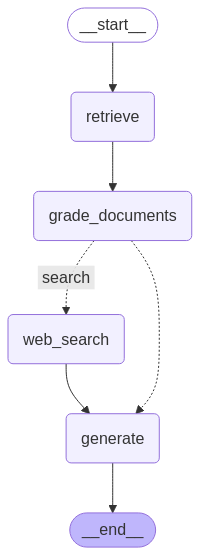

In [66]:
from IPython.display import Image, display
display(Image(custom_graph.get_graph(xray=True).draw_mermaid_png()))

In [71]:
import uuid   #it help to generate unique id's for each request.


def predict_custom_agent_local_answer(example: dict):      #this example contain the user question.
    config = {"configurable": {"thread_id": str(uuid.uuid4())}}     #new unique ID (thread_id) for every function call.
    state_dict = custom_graph.invoke(
        {"question": example["input"], "steps": []}, config         # Empty list to track processing steps
    )
    return {"response": state_dict["generation"]}    #we can also return the state_dict but its optional to get the generate result.


example = {"input": "what is air bag in the car?"}
response = predict_custom_agent_local_answer(example)
response

Raw response: Step 1: Analyze the question.
The question asks for an explanation of what an airbag in a car is.

Step 2: Analyze the fact provided.
The fact provided discusses the concept of Retrieval-Augmented Generation (RAG), which is a technique used in artificial intelligence to enhance the accuracy of generative AI models.

Step 3: Determine relevance.
The fact provided is about AI and specifically about a technique used in AI, which has no direct relation to the question about airbags in cars.

Step 4: Conclusion.
The fact provided is not relevant to the question.

{"score": "no"}


Raw response: Step by step reasoning:

1. The question asks for the definition or explanation of what an air bag in a car is.
2. The provided fact talks about the mechanism of multi-headed attention in neural networks, specifically in the context of the Transformer model, which is used in machine learning and natural language processing.
3. The content of the fact does not in any way relate to the function, purpose, or explanation of an airbag in a car.
4. There is no information provided in the fact that can be used to answer the question about airbags in cars.

Conclusion: The fact given is not relevant to the question asked.

{"score": "no"}
Final search value: Yes


{'response': 'According to the document, an airbag is a vehicle occupant-restraint system designed to inflate rapidly in milliseconds during a collision and then deflate afterwards, providing added protection in combination with seat belts.'}